# SIR: EDA

In [1]:
import covsirphy as cs
from pprint import pprint
import sys

C:\Users\Lupo\anaconda3\envs\Intro_to_Data_Science_20220419\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
kaggle_path = sys.path[0] + '/../kaggle/input'
loader = cs.DataLoader(kaggle_path)
jhu_data = loader.jhu()

In [4]:
# check of raw data
jhu_data.raw.tail() 

,Date,ISO3,Country,Province,Confirmed,Infected,Fatal,Recovered,Population
1272568,2022-05-05,ZWE,Zimbabwe,-,248050.0,NaN,5471.0,82994.0,14439018.0
1272569,2022-05-06,ZWE,Zimbabwe,-,248214.0,NaN,5473.0,82994.0,14439018.0
1272570,2022-05-07,ZWE,Zimbabwe,-,248214.0,NaN,5473.0,82994.0,14439018.0
1272571,2022-05-08,ZWE,Zimbabwe,-,248352.0,NaN,5476.0,82994.0,14439018.0
1272572,2022-05-09,ZWE,Zimbabwe,-,248536.0,NaN,5479.0,82994.0,14439018.0


In [ ]:
# check of cleaned data
jhu_data.cleaned().tail()

In [8]:
# info
jhu_data.cleaned().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272573 entries, 0 to 1272572
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Date        1272573 non-null  datetime64[ns]
 1   ISO3        1272573 non-null  category      
 2   Country     1272573 non-null  category      
 3   Province    1272573 non-null  category      
 4   Confirmed   1272573 non-null  int64         
 5   Infected    1272573 non-null  int64         
 6   Fatal       1272573 non-null  int64         
 7   Recovered   1272573 non-null  int64         
 8   Population  1272573 non-null  int64         
dtypes: category(3), datetime64[ns](1), int64(5)
memory usage: 65.6 MB


In [11]:
# total dataframe
total_df = jhu_data.total()
total_df.head()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-01-01,0,0,0,0,NaN,NaN,NaN
2020-01-02,1,0,0,1,0.0,1.0,0.0
2020-01-03,0,0,0,0,NaN,NaN,NaN
2020-01-04,1,1,0,0,0.0,0.0,NaN
2020-01-05,1,1,0,0,0.0,0.0,NaN


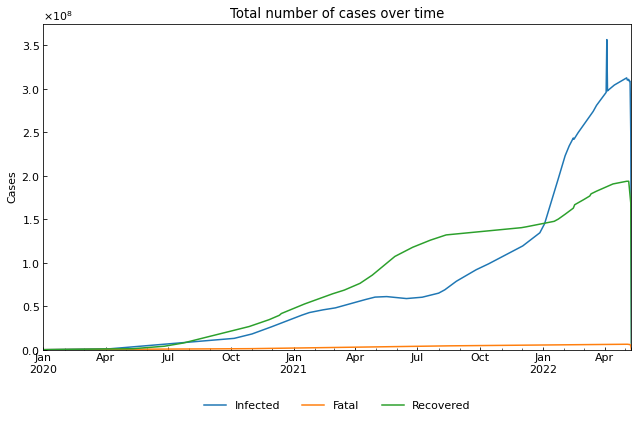

In [12]:
# cs.line_plot() funtion
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

In [13]:
# statistics of fatality rate and recovery rate
total_df.loc[:, total_df.columns.str.contains("per")].describe().T

,count,mean,std,min,25%,50%,75%,max
Fatal per Confirmed,859.0,0.026527,0.013155,0.0,0.020388,0.021677,0.030280,0.065202
Recovered per Confirmed,859.0,0.464477,0.181770,0.0,0.388033,0.551141,0.580314,1.000000
Fatal per (Fatal or Recovered),851.0,0.117040,0.218771,0.0,0.033870,0.036697,0.061499,1.000000


### Subset for an area

In [14]:
# Specify country name
df, complement = jhu_data.records("Switzerland") # skipping of auto complementation of data with auto_complement = FaLSE
# Or, specify ISO3 code
# df, complement = jhu_data.records("SUI")
# Show records
display(df.tail())
# Show details of complement
print(complement)

,Date,Confirmed,Infected,Fatal,Recovered,Susceptible
787,2022-04-29,3614530,44453,13186,3556891,4898697
788,2022-04-30,3616018,43173,13187,3559658,4897209
789,2022-05-01,3617001,40847,13188,3562966,4896226
790,2022-05-02,3619035,41010,13189,3564836,4894192
791,2022-05-03,3619040,38524,13189,3567327,4894187


partially complemented recovered data


In [16]:
df, _ = jhu_data.records("Switzerland", province="Bern") # find out how to see possible provinces?
df.tail()

,Date,Confirmed,Infected,Fatal,Recovered,Susceptible
780,2022-05-02,411474,4617,1531,405326,619626
781,2022-05-03,411474,4294,1531,405649,619626
782,2022-05-04,411474,3733,1531,406210,619626
783,2022-05-05,411474,3285,1531,406658,619626
784,2022-05-06,411474,2816,1531,407127,619626


In [20]:
df, _ = jhu_data.records("Switzerland", province="Zurich") # find out how to see possible provinces?
df.tail()

,Date,Confirmed,Infected,Fatal,Recovered,Susceptible
781,2022-05-02,626243,8848,1774,615621,878057
782,2022-05-03,626245,8317,1774,616154,878055
783,2022-05-04,626245,7255,1774,617216,878055
784,2022-05-05,626245,6388,1774,618083,878055
785,2022-05-06,626245,5649,1774,618822,878055


In [45]:
df, _ = jhu_data.records("Switzerland", province="Geneve") 
df.tail()
# no records > 0 in Geneva

,Date,Confirmed,Infected,Fatal,Recovered,Susceptible
783,2022-05-04,237094,2668,884,233542,258106
784,2022-05-05,237094,2336,884,233874,258106
785,2022-05-06,237094,2037,884,234173,258106
786,2022-05-07,237094,1789,884,234421,258106
787,2022-05-08,237094,1640,884,234570,258106


In [26]:
# quick overview of available countries
pprint(jhu_data.countries(), compact=True)  

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
 'Bolivia', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
 'Cyprus', 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark',
 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France',
 'French Guiana', 'French Polynesia', 'Gabo

In [27]:
# avg recovery period
recovery_period = jhu_data.calculate_recovery_period()
print(f"Average recovery period: {recovery_period} [days]")

Average recovery period: 15 [days]


### Implementation of Maps

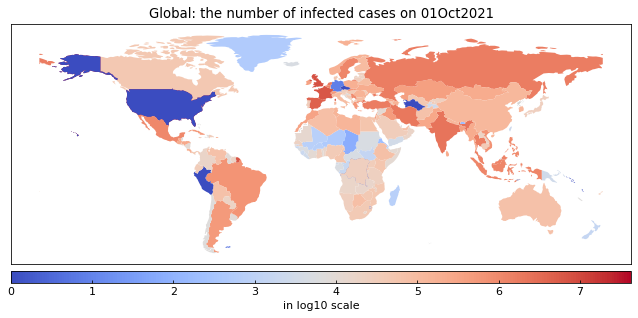

In [29]:
# global map, country unspecified

# jhu_data.map(country=None, variable="Infected") # wihtout a specified date it takes last available timestamp
# To set included/exclude some countries
# jhu_data.map(country=None, variable="Infected", included=["Japan"])
# jhu_data.map(country=None, variable="Infected", excluded=["Japan"])
# To change the date
jhu_data.map(country=None, variable="Infected", date="01Oct2021")

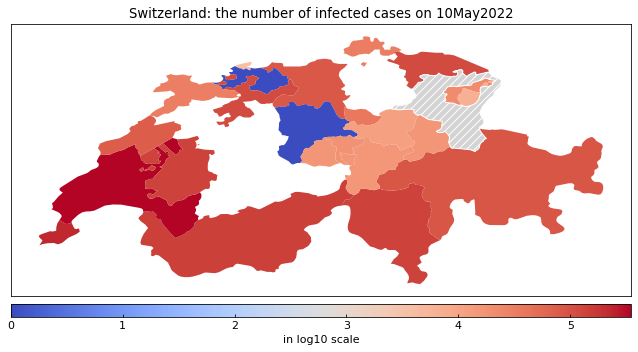

In [39]:
# map of data on province level

# jhu_data.map(country="Switzerland", variable="Infected")
# To set included/exclude some countries
# jhu_data.map(country="Switzerland", variable="Infected", included=["Zurich"])
jhu_data.map(country="Switzerland", variable="Infected", excluded=["Bern", 'Zurich'])
# To change the date
# jhu_data.map(country="Japan", variable="Infected", date="01Oct2021")

In [43]:
# values of map

jhu_data.layer(country="Switzerland").tail()

,Date,ISO3,Country,Province,Confirmed,Infected,Fatal,Recovered,Population
25147,2022-05-02,CHE,Switzerland,Zurich,626243,624469,1774,0,1504300
25148,2022-05-03,CHE,Switzerland,Zurich,626245,624471,1774,0,1504300
25149,2022-05-04,CHE,Switzerland,Zurich,626245,624471,1774,0,1504300
25150,2022-05-05,CHE,Switzerland,Zurich,626245,624471,1774,0,1504300
25151,2022-05-06,CHE,Switzerland,Zurich,626245,624471,1774,0,1504300


In [44]:
# province names

cantons = []

for canton in jhu_data.layer(country = 'Switzerland')['Province']:
    if canton not in cantons:
        cantons.append(canton)
        
print(cantons)

['Aargau', 'Appenzell Ausserrhoden', 'Appenzell Innerrhoden', 'Basel-Landschaft', 'Basel-Stadt', 'Baselland', 'Bern', 'Fribourg', 'Geneva', 'Geneve', 'Glarus', 'Graubunden', 'Grisons', 'Jura', 'Lucerne', 'Luzern', 'Neuchatel', 'Nidwalden', 'Obwalden', 'Schaffhausen', 'Schwyz', 'Solothurn', 'St. Gallen', 'St.Gallen', 'Thurgau', 'Ticino', 'Uri', 'Valais', 'Vaud', 'Zug', 'Zurich']


### OxCGRT indicators

school_closing,
workplace_closing,
cancel_events,
gatherings_restrictions,
transport_closing,
stay_home_restrictions,
internal_movement_restrictions,
international_movement_restrictions,
information_campaigns,
testing_policy,
contact_tracing.

In [49]:
oxcgrt_data = loader.oxcgrt()
type(oxcgrt_data)

<class 'covsirphy.cleaning.oxcgrt.OxCGRTData'>

In [53]:
# raw data is similar as in jhu

# Description
print(oxcgrt_data.citation)
# Raw
oxcgrt_data.raw.tail()
# cleaned
oxcgrt_data.cleaned().tail()

,Date,ISO3,Country,Province,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
1276846,2022-01-15,GRL,Greenland,Syddanmark,1.0,2.0,1.0,2.0,1.0,1.0,-1.0,2.0,2.0,3.0,2.0,-38.89
1276847,2022-01-16,GRL,Greenland,Syddanmark,1.0,2.0,1.0,2.0,1.0,1.0,-1.0,2.0,2.0,3.0,2.0,-38.89
1276848,2022-01-17,GRL,Greenland,Syddanmark,1.0,2.0,1.0,2.0,1.0,1.0,-1.0,2.0,2.0,3.0,2.0,-38.89
1276849,2022-01-18,GRL,Greenland,Syddanmark,1.0,2.0,1.0,2.0,1.0,1.0,-1.0,2.0,2.0,3.0,2.0,-38.89
1276850,2022-01-19,GRL,Greenland,Syddanmark,1.0,2.0,1.0,2.0,1.0,1.0,-1.0,2.0,2.0,3.0,2.0,-38.89


In [56]:
oxc_sw = oxcgrt_data.subset('Switzerland')
oxcgrt_data.subset("Switzerland").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
828,2022-04-29,2.0,1.0,2.0,4.0,1.0,1.0,1.0,3.0,2.0,3.0,1.0,19.44
829,2022-04-30,2.0,1.0,2.0,4.0,1.0,1.0,1.0,3.0,2.0,3.0,1.0,19.44
830,2022-05-01,2.0,1.0,2.0,4.0,1.0,1.0,1.0,3.0,2.0,3.0,1.0,19.44
831,2022-05-02,2.0,1.0,2.0,4.0,1.0,1.0,1.0,3.0,2.0,3.0,1.0,19.44
832,2022-05-03,2.0,1.0,2.0,4.0,1.0,1.0,1.0,3.0,2.0,3.0,1.0,19.44


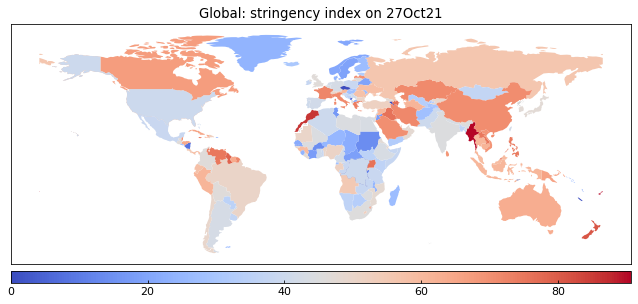

In [60]:
# visualize data in map
oxcgrt_data.map(variable = 'Stringency_index', date = '27Oct21')

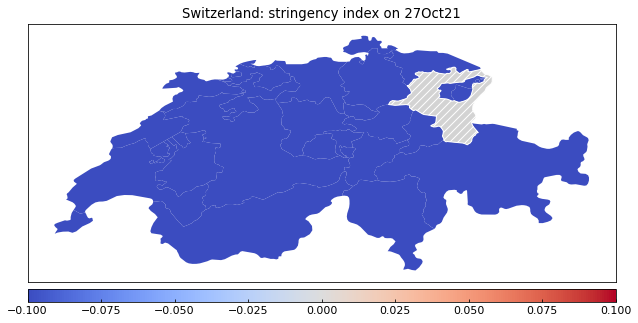

In [61]:
# visualize only one country, no province data

oxcgrt_data.map(country = 'Switzerland', variable = 'Stringency_index', date = '27Oct21')

### PCR data

In [63]:
pcr_data = loader.pcr()
type(pcr_data)

<class 'covsirphy.cleaning.pcr_data.PCRData'>

In [ ]:
# cleaned data set, .raw for raw
pcr_data.cleaned()

In [65]:
pcr_data.subset('Switzerland').head(5)

,Date,Tests,Tests_diff,Confirmed
0,2020-05-23,2512,0,30711
1,2020-05-24,4166,1654,30721
2,2020-05-25,8043,3877,30736
3,2020-05-26,13625,5582,30754
4,2020-05-27,18533,4908,30779


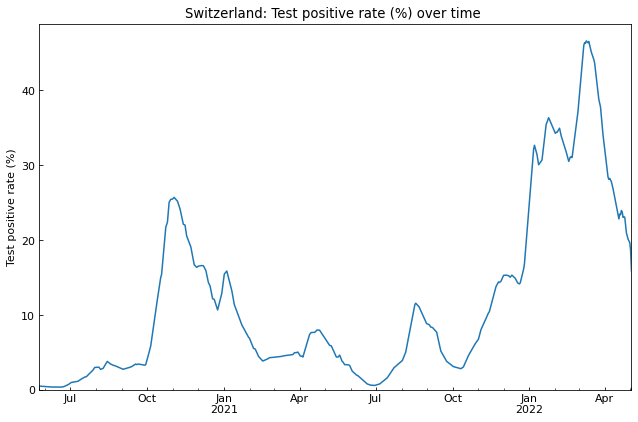

,Date,ISO3,Country,Province,Tests,Confirmed,Tests_diff,Confirmed_diff,Test_positive_rate
0,2020-05-24,CHE,Switzerland,-,4166,30721,3777.285714,18.428571,0.487879
1,2020-05-25,CHE,Switzerland,-,8043,30736,3777.285714,18.428571,0.487879
2,2020-05-26,CHE,Switzerland,-,13625,30754,3777.285714,18.428571,0.487879
3,2020-05-27,CHE,Switzerland,-,18533,30779,3777.285714,18.428571,0.487879
4,2020-05-28,CHE,Switzerland,-,22685,30809,3777.285714,18.428571,0.487879
...,...,...,...,...,...,...,...,...,...
705,2022-04-29,CHE,Switzerland,-,20827383,3614530,12618.857143,2537.571429,20.109360
706,2022-04-30,CHE,Switzerland,-,20835496,3616018,12367.142857,2461.428571,19.902969
707,2022-05-01,CHE,Switzerland,-,20840667,3617001,12119.714286,2383.285714,19.664537
708,2022-05-02,CHE,Switzerland,-,20851897,3619035,11381.571429,2120.000000,18.626602


In [67]:
pcr_data.positive_rate(country = 'Switzerland')

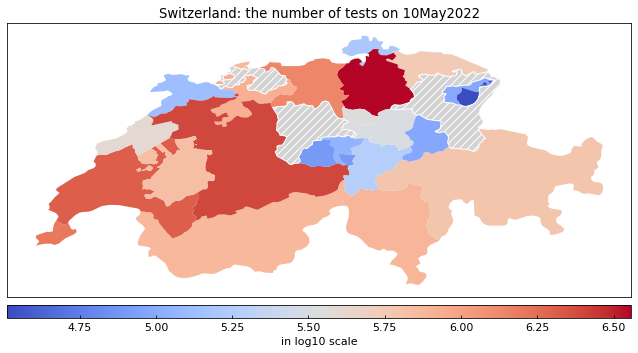

In [68]:
# map the pcr data
pcr_data.map(country = 'Switzerland')

### Vaccination data

Variables:

Vaccinations: cumulative number of vaccinations

Vaccinations_boosters: cumulative number of booster vaccinations

Vaccinated_once: cumulative number of people who received at least one vaccine dose

Vaccinated_full: cumulative number of people who received all doses prescribed by the protocol

In [ ]:
vaccine_data = loader.vaccine()

In [73]:
_ = vaccine_data.cleaned().tail()

In [75]:
_ = vaccine_data.subset('Switzerland')

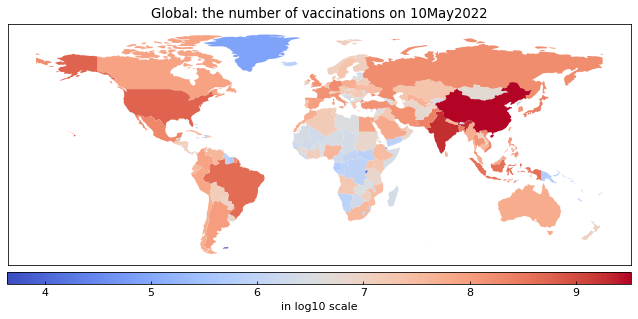

In [76]:
vaccine_data.map()

In [77]:
# values for map

_ = vaccine_data.layer().head()

### Mobility Data

In [80]:
mobility_data = loader.mobility()

In [81]:
mobility_data.cleaned().head()

,Date,ISO3,Country,Province,Mobility_grocery_and_pharmacy,Mobility_parks,Mobility_transit_stations,Mobility_retail_and_recreation,Mobility_residential,Mobility_workplaces
24,2020-02-15,AFG,Afghanistan,-,90,100,98,91,105,72
25,2020-02-16,AFG,Afghanistan,-,111,101,110,103,100,104
26,2020-02-17,AFG,Afghanistan,-,111,102,109,106,99,105
27,2020-02-18,AFG,Afghanistan,-,105,103,109,103,99,106
28,2020-02-19,AFG,Afghanistan,-,103,101,100,99,101,105


##### Note for variables

Definition of variables are as follows.

Mobility_grocery_and_pharmacy (int): % to baseline in visits (grocery markets, pharmacies etc.)

Mobility_parks (int): % to baseline in visits (parks etc.)

Mobility_transit_stations (int): % to baseline in visits (public transport hubs etc.)

Mobility_retail_and_recreation (int): % to baseline in visits (restaurant, museums etc.)

Mobility_residential (int): % to baseline in visits (places of residence)

Mobility_workplaces (int): % to baseline in visits (places of work)

In [85]:
mobility_data.subset('Switzerland').head()

,Date,Mobility_grocery_and_pharmacy,Mobility_parks,Mobility_transit_stations,Mobility_retail_and_recreation,Mobility_residential,Mobility_workplaces


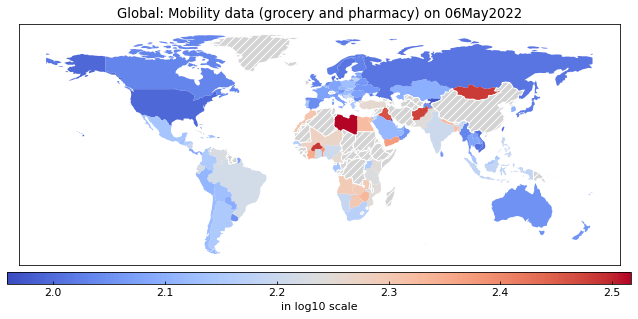

In [97]:
mobility_data.map()

### Pyramid data

useful for analysing paramters and influence on difference groups

In [98]:
pyramid_data = loader.pyramid()

In [99]:
pyramid_data.subset('Switzerland').head()

Retrieving population pyramid dataset (Switzerland) from https://data.worldbank.org/


,Age,Population,Per_total
0,0,90176,0.010976
1,1,90176,0.010976
2,2,90176,0.010976
3,3,90176,0.010976
4,4,90176,0.010976
